In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

from scipy import signal

# PPM Type 2 from poles and zeros

In [2]:
xtarget = np.array([0.5, 1.5, 5.0, 10.0, 100.0]) * 1e-03
ytarget_db = np.array([-17.0, -9.0, -4.0, -2.0, 0.0])
ytarget = np.power(10, ytarget_db / 20.0)

In [3]:
fs = 8000
T = 0.2         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# data box window
data = np.append(np.ones(int(0.12*fs)), np.zeros(int(0.08*fs)) )

In [5]:
b, a = signal.zpk2tf(z=[0.5], p=[0.90], k=0.2)
b, a

(array([ 0.2, -0.1]), array([ 1. , -0.9]))

In [8]:
b1 = np.array([0.20, -0.10])
a1 = [1.0, -0.90]

b2 = np.array([0.3, -0.280])
a2 = [1.0, -0.980]

In [126]:
# poles and zeros version
b1, a1 = signal.zpk2tf(z=[0.5], p=[0.90], k=0.1)
b2, a2 = signal.zpk2tf(z=[1], p=[0.0], k=0.5)
b2, a2

(array([ 0.5, -0.5]), array([1., 0.]))

In [7]:
# poles and zeros version
b1, a1 = signal.zpk2tf(z=[0.90], p=[0.98], k=0.2)
b2, a2 = signal.zpk2tf(z=[0.50], p=[0.80], k=0.4)
b2, a2

(array([ 0.4, -0.2]), array([ 1. , -0.8]))

In [25]:
# poles and zeros version
b1, a1 = signal.zpk2tf(z=[0.95], p=[0.984], k=0.32) #.982 0.36
b2, a2 = signal.zpk2tf(z=[-1.0], p=[0.84], k=0.08)
b2, a2

(array([0.08, 0.08]), array([ 1.  , -0.84]))

In [26]:
y1 = signal.lfilter(b1, a1, data)
y2 = signal.lfilter(b2, a2, signal.lfilter(b1, a1, data) )

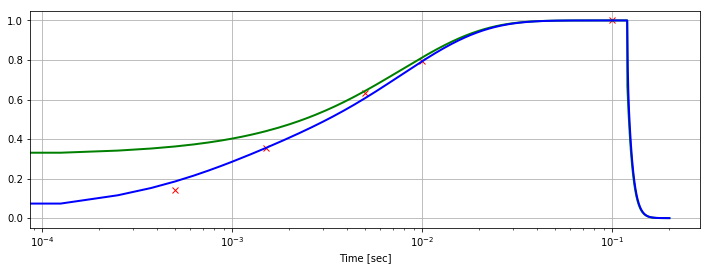

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(xtarget, ytarget, 'rx')
plt.plot(t, y1, 'g-', linewidth=2, label='filtered')
plt.plot(t, y2, 'b-', linewidth=2, label='filtered')
plt.xlabel('Time [sec]')
plt.xscale('log')
#plt.ylim(-24, 1)
plt.grid()
plt.show()

## Helper function

In [28]:
def fz2ba(freq, zero, fs):
    z, p, k = signal.butter(1, freq, btype='low', analog=False, fs=fs, output='zpk')
    k2 = (1 - np.absolute(p[0])) / (1 - zero)
    return signal.zpk2tf(z=[zero], p=p, k=k2)

In [51]:
b, a = fz2ba(150, 0, fs=8000)
b, a

(array([0.11137787, 0.        ]), array([ 1.        , -0.88862213]))

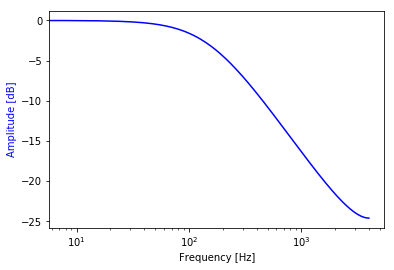

In [52]:
w, h = signal.freqz(b, a, fs=8000)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [Hz]')
plt.xscale('log')
plt.show()

# PPM Type 2

In [29]:
b1, a1 = fz2ba(24, 0.93, fs)
b2, a2 = fz2ba(240, -1.0, fs)

y1 = signal.lfilter(b1, a1, data)
y2 = signal.lfilter(b2, a2, signal.lfilter(b1, a1, data) )

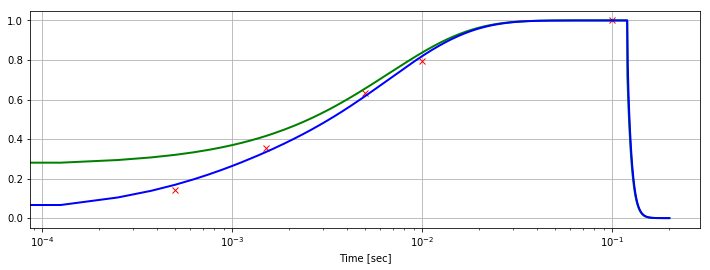

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(xtarget, ytarget, 'rx')
plt.plot(t, y1, 'g-', linewidth=2, label='filtered')
plt.plot(t, y2, 'b-', linewidth=2, label='filtered')
plt.xlabel('Time [sec]'); plt.xscale('log'); plt.grid()
plt.show()

## Solution with shelving filter fs=8kHz 

In [82]:
#b1, a1 = fz2ba(18, 0.97, fs)
b1, a1 = signal.butter(1, 17, btype='low', analog=False, fs=fs)
#b2, a2 = fz2ba(110, 0.0, fs)
b2, a2 = signal.butter(1, 100, btype='low', analog=False, fs=fs)

y1 = 0.5 * data + 0.5 * signal.lfilter(b1, a1, data)
y2 = signal.lfilter(b2, a2, y1)
b1, a1

(array([0.00663171, 0.00663171]), array([ 1.        , -0.98673658]))

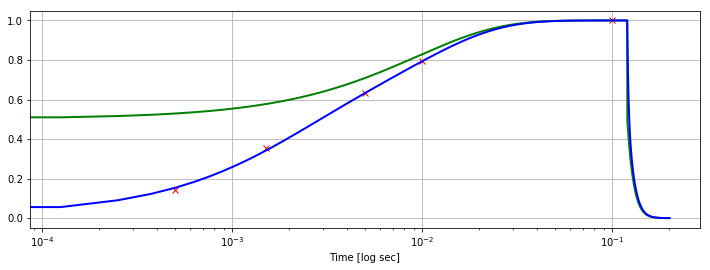

In [83]:
plt.figure(figsize=(12, 4))
plt.plot(xtarget, ytarget, 'rx')
plt.plot(t, y1, 'g-', linewidth=2, label='filtered')
plt.plot(t, y2, 'b-', linewidth=2, label='filtered')
plt.xlabel('Time [log sec]'); plt.xscale('log'); plt.grid()
plt.show()

## JMeter approach

In [73]:
#b1, a1 = fz2ba(14, 0.0, fs)
#b2, a2 = fz2ba(80, 0.0, fs)

b1, a1 = signal.butter(1, 14, btype='low', analog=False, fs=fs)
b2, a2 = signal.butter(1, 80, btype='low', analog=False, fs=fs)

y1 = signal.lfilter(b1, a1, data)
y2 = 0.5 * signal.lfilter(b2, a2, data) + 0.5 * signal.lfilter(b1, a1, data)

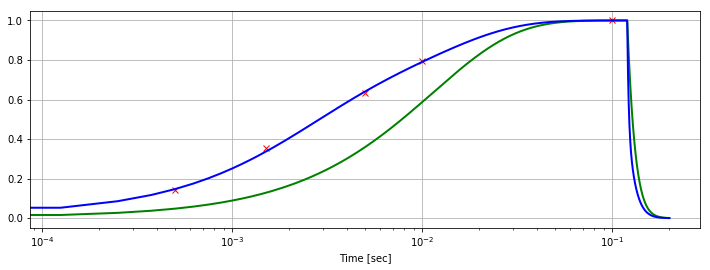

In [74]:
plt.figure(figsize=(12, 4))
plt.plot(xtarget, ytarget, 'rx')
plt.plot(t, y1, 'g-', linewidth=2, label='filtered')
plt.plot(t, y2, 'b-', linewidth=2, label='filtered')
plt.xlabel('Time [sec]'); plt.xscale('log'); plt.grid()
plt.show()

## fs=32kH

In [84]:
fs = 32000
T = 0.2         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# data box window
data = np.append(np.ones(int(0.12*fs)), np.zeros(int(0.08*fs)) )

In [85]:
b1, a1 = signal.butter(1, 17, btype='low', analog=False, fs=fs)
b2, a2 = signal.butter(1, 100, btype='low', analog=False, fs=fs)

y1 = 0.5 * data + 0.5 * signal.lfilter(b1, a1, data)
y2 = signal.lfilter(b2, a2, y1)
b1, a1

(array([0.00166619, 0.00166619]), array([ 1.        , -0.99666762]))

In [89]:
b1[0], a1[1]

(0.0016661918182721445, -0.9966676163634557)

In [90]:
b2[0], a2[1]

(0.00972234054502324, -0.9805553189099534)

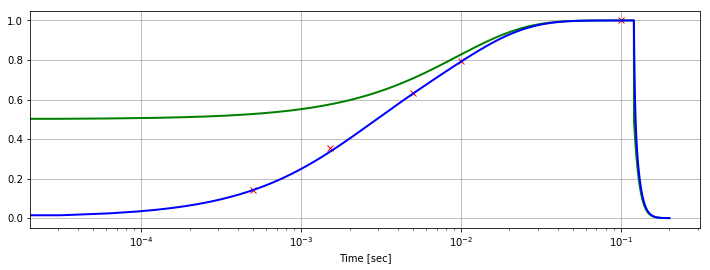

In [91]:
plt.figure(figsize=(12, 4))
plt.plot(xtarget, ytarget, 'rx')
plt.plot(t, y1, 'g-', linewidth=2, label='filtered')
plt.plot(t, y2, 'b-', linewidth=2, label='filtered')
plt.xlabel('Time [sec]'); plt.xscale('log'); plt.grid()
plt.show()